# 1. EDA

In [1]:
from tqdm import tqdm
import pandas as pd
from load_data import load_train_data, load_new_train_data
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import re

## 1.1 학습 데이터 불러오기

In [2]:
df = load_train_data()
df.head()

,id,sentence,subject_entity,object_entity,label
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨,no_relation
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당,no_relation
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹,org:member_of
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부,org:top_members/employees
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967,no_relation


<br>

## 1.2 데이터프레임 확장

In [3]:
new_df = load_new_train_data()

100%|██████████| 32470/32470 [00:04<00:00, 6763.36it/s]


In [4]:
new_df.head()

,id,sentence,subject_entity_word,subject_entity_start_idx,subject_entity_end_idx,subject_entity_type,object_entity_word,object_entity_start_idx,object_entity_end_idx,object_entity_type,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,24,26,ORG,조지 해리슨,13,18,PER,no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,19,23,ORG,대안신당,14,17,ORG,no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,21,24,ORG,한국프로축구연맹,34,41,ORG,org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,13,17,ORG,박정부,22,24,PER,org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,22,30,ORG,1967,0,3,DAT,no_relation,wikipedia


<br>

## 1.3 기본정보 확인

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        32470 non-null  int64 
 1   sentence                  32470 non-null  object
 2   subject_entity_word       32470 non-null  object
 3   subject_entity_start_idx  32470 non-null  int64 
 4   subject_entity_end_idx    32470 non-null  int64 
 5   subject_entity_type       32470 non-null  object
 6   object_entity_word        32470 non-null  object
 7   object_entity_start_idx   32470 non-null  int64 
 8   object_entity_end_idx     32470 non-null  int64 
 9   object_entity_type        32470 non-null  object
 10  label                     32470 non-null  object
 11  source                    32470 non-null  object
dtypes: int64(5), object(7)
memory usage: 3.0+ MB


<br>

결측치는 없는 걸로 확인됨

In [6]:
new_df.describe()

,id,subject_entity_start_idx,subject_entity_end_idx,object_entity_start_idx,object_entity_end_idx
count,32470.000000,32470.000000,32470.000000,32470.000000,32470.000000
mean,16234.500000,27.539852,31.655898,29.254050,33.424885
std,9373.425957,33.102263,33.265184,32.136991,32.202945
min,0.000000,0.000000,2.000000,0.000000,2.000000
25%,8117.250000,3.000000,7.000000,7.000000,11.000000
50%,16234.500000,17.000000,21.000000,19.000000,23.000000
75%,24351.750000,41.000000,45.000000,41.000000,45.000000
max,32469.000000,338.000000,341.000000,391.000000,395.000000


<br>

## 1.4 컬럼별 고유값 확인

In [7]:
column_list = new_df.columns.tolist()
column_list = [column for column in column_list if column not in ['id', 'sentence', 'subject_entity_start_idx', 'subject_entity_end_idx', 'object_entity_start_idx', 'object_entity_end_idx']]
print(column_list)

['subject_entity_word', 'subject_entity_type', 'object_entity_word', 'object_entity_type', 'label', 'source']


<br>

### 1.4.1 `subject_entity`

In [8]:
subset = new_df.groupby(['subject_entity_word', 'subject_entity_type'])['sentence'].count()
subset = subset.reset_index()
subset = subset.rename(columns={'sentence': 'count'})
subset = subset.sort_values('count', ascending=False).reset_index(drop=True)

print(len(subset))
print()

for i, row in subset.iterrows():
    print(f"{row['subject_entity_word']} | {row['subject_entity_type']} | {row['count']}")

12194

민주당 | ORG | 144
화순군 | ORG | 107
고흥군 | ORG | 99
광주광역시 | ORG | 92
더불어민주당 | ORG | 92
여수시 | ORG | 82
목포시 | ORG | 80
문재인 | PER | 80
영암군 | ORG | 75
포천시 | ORG | 73
FC 서울 | ORG | 71
기획재정부 | ORG | 70
영광군 | ORG | 69
두산 베어스 | ORG | 68
노무현 | PER | 67
해남군 | ORG | 66
곡성군 | ORG | 62
공무원연금공단 | ORG | 61
경남대학교 | ORG | 58
박정희 | PER | 53
러시아 | ORG | 52
김영삼 | PER | 51
김대중 | PER | 51
민주평화당 | ORG | 50
한국동서발전 | ORG | 49
담양군 | ORG | 49
엔씨소프트 | ORG | 48
삼성 라이온즈 | ORG | 48
나주시 | ORG | 48
삼성전자 | ORG | 48
신익희 | PER | 47
대한항공 | ORG | 46
요미우리 자이언츠 | ORG | 45
나경원 | PER | 45
보건복지부 | ORG | 45
베트남 | ORG | 45
뉴욕 양키스 | ORG | 44
광주여대 | ORG | 44
유럽 축구 연맹 | ORG | 44
통일민주당 | ORG | 43
자유민주연합 | ORG | 43
완도군 | ORG | 43
안철수 | PER | 42
자유당 | ORG | 42
하이트진로 | ORG | 42
정의당 | ORG | 41
대안신당 | ORG | 41
문화방송 | ORG | 41
질병관리본부 | ORG | 41
11번가 | ORG | 40
아이유 | PER | 40
프리미어리그 | ORG | 39
신안군 | ORG | 39
SK 와이번스 | ORG | 38
국민의당 | ORG | 38
양평군 | ORG | 37
심상정 | PER | 37
FC 바이에른 뮌헨 | ORG | 36
김정숙 | PER | 36
수원 삼성 블루윙즈 | ORG | 36
새정치국민회의 

<br>

- 같은 단어인데 type이 다른 경우가 존재한다.

In [9]:
dup = subset.groupby(['subject_entity_word'])['count'].count().reset_index()
dup_words = dup.loc[dup['count'] > 1, 'subject_entity_word'].tolist()

dup_subset = subset.loc[subset['subject_entity_word'].isin(dup_words), :].sort_values('subject_entity_word')
dup_subset

,subject_entity_word,subject_entity_type,count
1430,AB6IX,ORG,5
2813,AB6IX,PER,3
9190,ABBA,PER,1
2828,ABBA,ORG,3
9175,AJ 오세르,PER,1
...,...,...,...
837,호텔 델루나,ORG,7
5563,후지와라 씨,ORG,1
5564,후지와라 씨,PER,1
220,히틀러,PER,15


In [10]:
dup_subset['subject_entity_word'].unique().tolist()

['AB6IX',
 'ABBA',
 'AJ 오세르',
 'BTS',
 'DJ DOC',
 'EXO',
 'F. 오거스터스 하인츠',
 'Forbes',
 'GD&TOP',
 'GRAY',
 'ITZY',
 'Kygo',
 'MC 스나이퍼',
 'MFBTY',
 'NCT',
 'OLNL',
 'SG워너비',
 'TRCNG',
 'iKON',
 '가경제',
 '가리온',
 '가브리엘 바티스투타',
 '가와치 겐지',
 '가우디',
 '가즈나',
 '감스트',
 '걸걸중상',
 '검엑스',
 '게슈타포',
 '고시라카와',
 '고시라카와인',
 '과르디올라',
 '광서제',
 '기리보이',
 '기안84',
 '김대중',
 '김일성',
 '노르망디',
 '노무현',
 '노브고로드',
 '누레딘',
 '뉴이스트',
 '다비치',
 '다이나믹 듀오',
 '디나모 키예프',
 '딥 퍼플',
 '라요 바예카노',
 '라이관린',
 '레나토 이바라',
 '레알 마드리드',
 '레이던',
 '레프 야신',
 '로켓단',
 '롤링 스톤스',
 '루다크리스',
 '린킨 파크',
 '마리오',
 '마우리아',
 '마이노스',
 '메탈리카',
 '멘셰비키',
 '멜로망스',
 '몬스타엑스',
 '몬토네로스',
 '바그다드',
 '밴쿠버',
 '베르겐',
 '베를렌',
 '벤피카',
 '볼빨간사춘기',
 '부가티',
 '브르타뉴',
 '비틀즈',
 '빈두사라',
 '빔비사라',
 '살라딘',
 '소녀시대',
 '소크라치스',
 '소피아',
 '손기정',
 '쇼니 씨',
 '숭정제',
 '스와로브스키',
 '스월츠',
 '스윙스',
 '스튜디오드래곤',
 '스플리트',
 '시로스카이',
 '아스트로',
 '아우구스투스',
 '아이유',
 '아테네',
 '알마문',
 '알스벤스칸',
 '알키비아데스',
 '야로슬라블',
 '양평군',
 '언에듀케이티드 키드',
 '에르제',
 '에픽하이',
 '연산군',
 '예식진',
 '오페스',
 '올랭피크 드 마르세유',
 '올랭피크 리옹',
 '왕징

<br>

### 1.4.2 `subject_entity_word`

In [11]:
subset = new_df['subject_entity_word'].value_counts().reset_index()
subset = subset.rename(columns={'subject_entity_word': 'count', 'index': 'subject_entity_word'})

print(len(subset))
print()

for i, row in subset.iterrows():
    print(f"{row['subject_entity_word']} | {row['count']}")

12052

민주당 | 144
화순군 | 107
고흥군 | 99
더불어민주당 | 92
광주광역시 | 92
여수시 | 82
문재인 | 80
목포시 | 80
영암군 | 75
포천시 | 73
FC 서울 | 71
기획재정부 | 70
영광군 | 69
두산 베어스 | 68
노무현 | 68
해남군 | 66
곡성군 | 62
공무원연금공단 | 61
경남대학교 | 58
박정희 | 53
김대중 | 52
러시아 | 52
김영삼 | 51
민주평화당 | 50
담양군 | 49
한국동서발전 | 49
나주시 | 48
삼성전자 | 48
엔씨소프트 | 48
삼성 라이온즈 | 48
신익희 | 47
대한항공 | 46
나경원 | 45
베트남 | 45
보건복지부 | 45
요미우리 자이언츠 | 45
유럽 축구 연맹 | 44
광주여대 | 44
뉴욕 양키스 | 44
완도군 | 43
자유민주연합 | 43
통일민주당 | 43
하이트진로 | 42
자유당 | 42
안철수 | 42
아이유 | 42
정의당 | 41
문화방송 | 41
질병관리본부 | 41
대안신당 | 41
11번가 | 40
신안군 | 39
프리미어리그 | 39
국민의당 | 38
SK 와이번스 | 38
양평군 | 38
심상정 | 37
김정숙 | 36
수원 삼성 블루윙즈 | 36
FC 바이에른 뮌헨 | 36
신세계 | 35
새정치국민회의 | 35
미래통합당 | 34
전북 현대 모터스 | 33
NC 다이노스 | 33
한국철도공사 | 33
유벤투스 | 33
김정은 | 33
고양시 | 33
한화 이글스 | 32
국제수영연맹 | 32
국제축구연맹 | 32
김정일 | 32
사회당 | 31
박근혜 | 30
진보신당 | 30
광산구 | 30
안창호 | 30
유재석 | 29
한국남동발전 | 29
오뚜기 | 29
유시민 | 29
KIA 타이거즈 | 29
SK하이닉스 | 29
전희경 | 29
이개호 | 29
광주여자대학교 | 28
민주정의당 | 28
인천광역시 | 28
신한국당 | 28
KBO 리그 | 27
네덜란드 | 27
프로이센 | 27
보루시아 도르트문트 | 27


<br>

### 1.4.3 `subject_entity_type`

In [12]:
subset = new_df['subject_entity_type'].value_counts().reset_index()
subset = subset.rename(columns={'subject_entity_type': 'count', 'index': 'subject_entity_type'})

print(len(subset))
print()

for i, row in subset.iterrows():
    print(f"{row['subject_entity_type']} | {row['count']}")

2

PER | 16786
ORG | 15684


- `PER`: 인명
- `ORG`: 기관명

<br>

### 1.4.4 `object_entity`

In [13]:
subset = new_df.groupby(['object_entity_word', 'object_entity_type'])['sentence'].count()
subset = subset.reset_index()
subset = subset.rename(columns={'sentence': 'count'})
subset = subset.sort_values('count', ascending=False).reset_index(drop=True)

print(len(subset))
print()

for i, row in subset.iterrows():
    print(f"{row['object_entity_word']} | {row['object_entity_type']} | {row['count']}")

11171

자유한국당 | ORG | 268
대한민국 | LOC | 239
더불어민주당 | ORG | 234
문재인 | PER | 132
김대중 | PER | 111
정의당 | ORG | 111
골키퍼 | POH | 109
국민의당 | ORG | 108
구충곤 | PER | 102
이승만 | PER | 99
캐나다 | LOC | 98
송귀근 | PER | 96
UEFA | POH | 94
이용섭 | PER | 88
스페인 | LOC | 82
독립운동가 | POH | 80
프랑스 | LOC | 78
이선재 | PER | 77
전동평 | PER | 76
김종식 | PER | 75
민주당 | ORG | 73
분데스리가 | ORG | 73
조선민주주의인민공화국 | ORG | 69
권오봉 | PER | 69
공화당 | ORG | 67
네덜란드 | LOC | 67
2016년 | DAT | 66
박재규 | PER | 65
스웨덴 | LOC | 64
물리학 | POH | 64
박정희 | PER | 63
명현관 | PER | 62
정남준 | PER | 61
박윤국 | PER | 61
브라질 | LOC | 58
NBA | ORG | 58
공화국 | ORG | 56
유근기 | PER | 56
아나운서 | POH | 54
소설가 | POH | 54
대통령 | POH | 54
자동차 | POH | 54
프리미어리그 | ORG | 52
조선로동당 | ORG | 52
민생당 | ORG | 52
러시아 | LOC | 52
이탈리아 | LOC | 52
경기도 | ORG | 51
유격수 | POH | 51
전라남도 | ORG | 51
경기도 | LOC | 50
비례대표 | POH | 50
국토교통부 | ORG | 49
공격수 | POH | 49
잉글랜드 | LOC | 49
2007 | DAT | 48
노무현 | PER | 48
세리에 A | POH | 47
홍남기 | PER | 47
최형식 | PER | 46
박일준 | PER | 46
김영삼 | PER | 46
노동당 | ORG | 45
한

<br>

- 같은 단어인데 type이 다른 경우가 존재한다.

In [14]:
dup = subset.groupby(['object_entity_word'])['count'].count().reset_index()
dup_words = dup.loc[dup['count'] > 1, 'object_entity_word'].tolist()

dup_subset = subset.loc[subset['object_entity_word'].isin(dup_words), :].sort_values('object_entity_word')
dup_subset

,object_entity_word,object_entity_type,count
3000,000,NOH,2
8153,000,DAT,1
8133,1. FC 카이저슬라우테른,ORG,1
8132,1. FC 카이저슬라우테른,NOH,1
8136,1. FSV 마인츠 05,ORG,1
...,...,...,...
1662,힌두교,ORG,4
4721,힌두교,POH,1
3002,힐스테이트,POH,2
2332,힐스테이트,ORG,3


In [15]:
dup_subset['object_entity_word'].unique().tolist()

['000',
 '1. FC 카이저슬라우테른',
 '1. FSV 마인츠 05',
 '1979년',
 '1982년 서울',
 '1990년 FIFA 월드컵',
 '1998년 FIFA 월드컵',
 '1루수',
 '2. 분데스리가',
 '2000',
 "2002년 MBC 드라마 '로망스'",
 "2002년 뮤지컬 '렌트'",
 '3000',
 '626년',
 'AFC',
 'AMD',
 'ANA',
 'ASTRO',
 'A리그',
 'BBC',
 'Baghdad',
 'Beach Boys',
 'CBS',
 'CJ그룹 회장',
 'Cinque Terre',
 'DC 코믹스',
 'DFB',
 'DJ DOC',
 'DJ KOO',
 'FC 바이에른 뮌헨',
 'FIBA',
 'FIFA',
 'FINA',
 'FIVB',
 'FT아일랜드',
 'GGG',
 'Georgia',
 'H.O.T.',
 'IEEE',
 'ISO',
 'J-U',
 'J1리그',
 'JBJ',
 'JBJ95',
 'JTBC 대표이사 사장',
 'Justin Timberlake',
 'K3리그',
 'K3리그 어드밴스',
 'KBL',
 'KBS',
 'KBS N',
 'KFA',
 'KSA',
 'KT 커스터머',
 'KT&G',
 'KeSPA',
 'K리그',
 'K리그 챌린지',
 'K리그 클래식',
 'K리그1',
 'K리그2',
 'LSI',
 'Leonardo da Vinci',
 'MBC',
 'N.EX.T',
 'NBA',
 'NEWS',
 'NORAD',
 'Nature',
 'Netflix',
 'New Zealand',
 'PAOK',
 'SBS',
 'SK 와이번스',
 'SK그룹 회장',
 'SMAP',
 'SS501',
 'TEEN TEEN',
 'UCI',
 'UEFA',
 'USL 프로',
 'WBSC',
 'WHO 사무총장',
 'WKBL',
 'WK리그',
 'X-Teen',
 'ZARD',
 '少弐氏',
 '藤原氏',
 '가경제',
 '가마쿠라 막부',
 '가이아

<br>

### 1.4.5 `object_entity_word`

In [16]:
subset = new_df['object_entity_word'].value_counts().reset_index()
subset = subset.rename(columns={'object_entity_word': 'count', 'index': 'object_entity_word'})

print(len(subset))
print()

for i, row in subset.iterrows():
    print(f"{row['object_entity_word']} | {row['count']}")

10226

대한민국 | 276
자유한국당 | 268
더불어민주당 | 236
문재인 | 135
UEFA | 117
캐나다 | 115
김대중 | 113
스페인 | 113
정의당 | 111
골키퍼 | 110
국민의당 | 108
경기도 | 108
프랑스 | 107
네덜란드 | 106
구충곤 | 102
이승만 | 100
이탈리아 | 96
송귀근 | 96
이용섭 | 88
잉글랜드 | 85
NBA | 81
독립운동가 | 80
스웨덴 | 79
조선민주주의인민공화국 | 78
브라질 | 78
이선재 | 77
전동평 | 76
전라남도 | 76
김종식 | 75
민주당 | 74
분데스리가 | 74
노무현 | 73
러시아 | 71
권오봉 | 70
세리에 A | 70
자동차 | 68
물리학 | 68
공화당 | 68
2016년 | 66
박재규 | 65
박정희 | 64
공화국 | 64
프리미어리그 | 64
명현관 | 62
정남준 | 61
박윤국 | 61
아르헨티나 | 61
대통령 | 57
그리스 | 57
유근기 | 56
FIFA | 54
아나운서 | 54
소설가 | 54
폴란드 | 52
민생당 | 52
조선로동당 | 52
유격수 | 51
오스트레일리아 | 51
모스크바 | 50
비례대표 | 50
국토교통부 | 49
공격수 | 49
2007 | 48
덴마크 | 47
홍남기 | 47
최형식 | 46
김영삼 | 46
박일준 | 46
노동당 | 45
한나라당 | 44
MBC | 44
트로트 | 42
변호사 | 42
김인규 | 42
미래통합당 | 42
작곡가 | 42
2011년 | 42
신민당 | 42
보수당 | 42
스위스 | 41
안철수 | 41
센트럴 리그 | 41
K리그1 | 40
오스트리아 | 39
신우철 | 39
외야수 | 39
프로듀서 | 39
주식회사 | 39
SK텔레콤 | 38
2012 | 38
SM엔터테인먼트 | 38
2009 | 38
물리학자 | 38
박근혜 | 38
강인규 | 38
방송인 | 37
삼성 라이온즈 | 37
노르웨이 | 36
2008 | 36
2010 | 36
싱

<br>

### 1.4.6 `object_entity_type`

In [17]:
subset = new_df['object_entity_type'].value_counts().reset_index()
subset = subset.rename(columns={'object_entity_type': 'count', 'index': 'object_entity_type'})

print(len(subset))
print()

for i, row in subset.iterrows():
    print(f"{row['object_entity_type']} | {row['count']}")

6

PER | 9788
ORG | 9346
POH | 5113
DAT | 4249
LOC | 3561
NOH | 413


- `PER`: 인명
- `ORG`: 기관명
- `POH`: 기타
- `DAT`: 날짜
- `LOC`: 지명
- `NOH`: 기타 수량표현

In [18]:
new_df.loc[new_df['object_entity_type'] == 'POH', ['object_entity_word', 'object_entity_type']]

,object_entity_word,object_entity_type
11,싱어송라이터,POH
24,1루수,POH
30,Voice of America,POH
38,국악인,POH
41,만화가,POH
...,...,...
32444,K리그1,POH
32446,서울시립과학관 관장,POH
32458,Stir Friday Night,POH
32462,공격수,POH


In [19]:
new_df.loc[new_df['object_entity_type'] == 'NOH', ['object_entity_word', 'object_entity_type']]

,object_entity_word,object_entity_type
72,"49만 5,000명",NOH
107,031-909-9000,NOH
109,48kg,NOH
192,18팀,NOH
194,500만,NOH
...,...,...
32303,홋카이도 제1구,NOH
32329,13개,NOH
32356,12개,NOH
32448,14개,NOH


<br>

### 1.4.7 `label`

<AxesSubplot:xlabel='count', ylabel='label'>

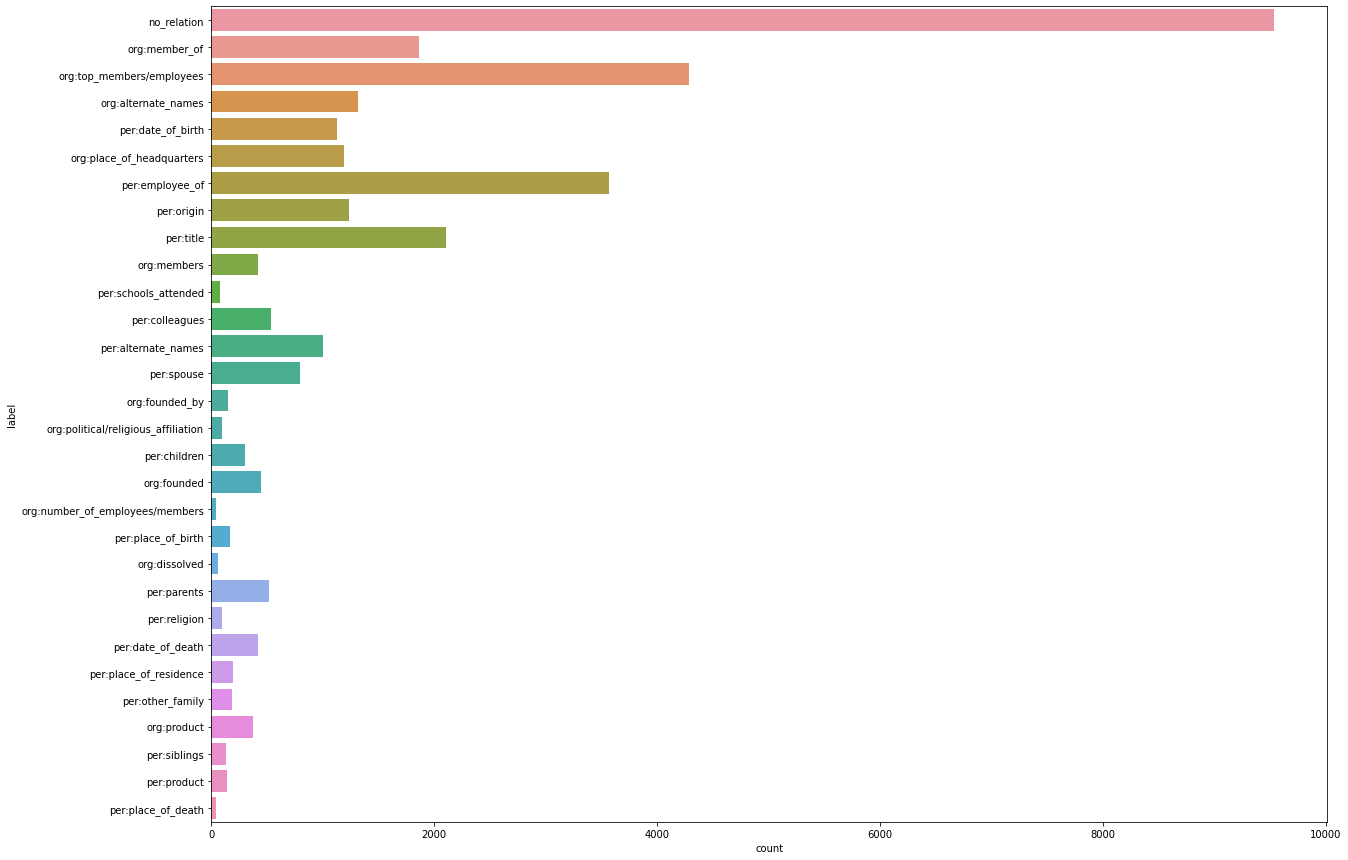

In [20]:
plt.figure(figsize=(20, 15))
sns.countplot(data=new_df, y='label')

<br>

### 1.4.8 `source`

<AxesSubplot:xlabel='count', ylabel='source'>

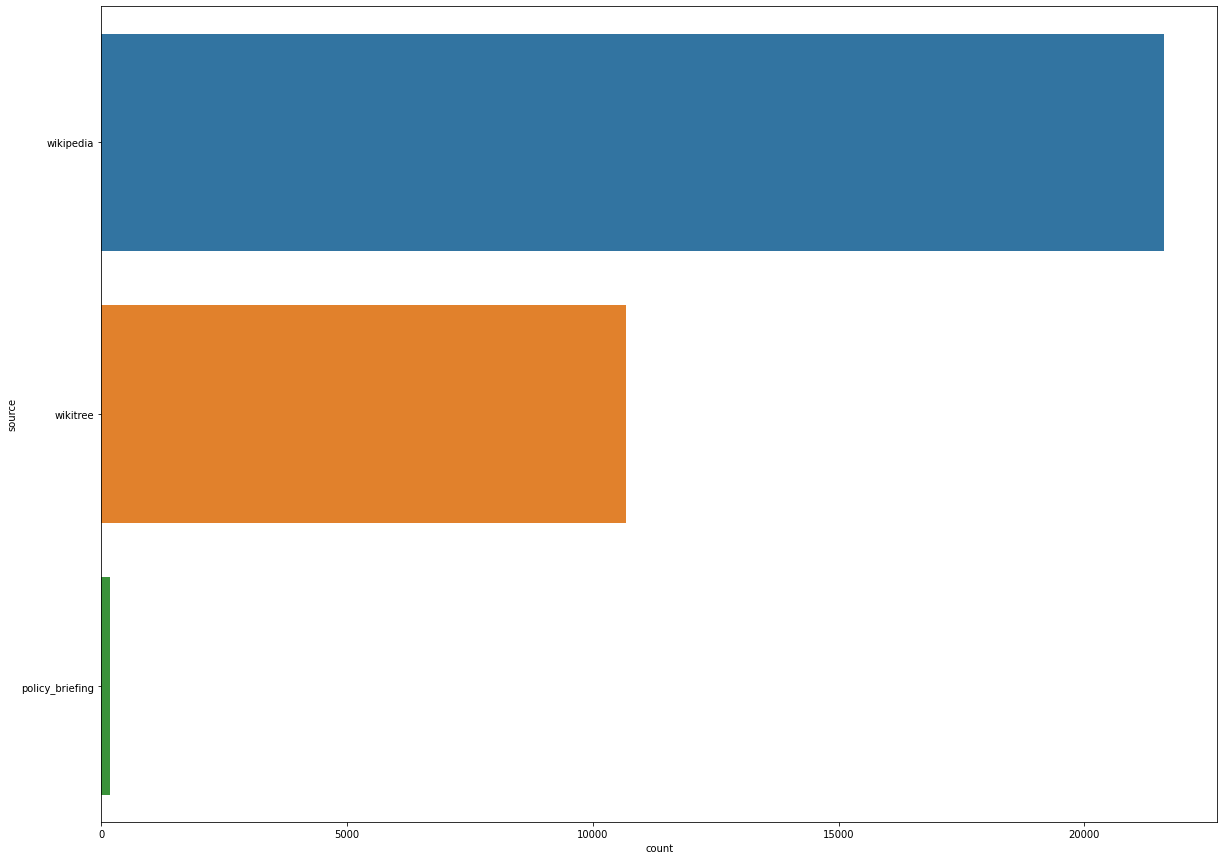

In [21]:
plt.figure(figsize=(20, 15))
sns.countplot(data=new_df, y='source')

<br>

## 1.5 Entity 하이라이팅

<br>

### 1.5.1 시각화 함수 준비

In [22]:
def label_highlight(label, s_obj, o_obj):
    for obj, word in zip([s_obj, o_obj], label.split(':')):
        label = label.replace(
            word,
            f"<span style='color:{obj['color']}; background-color:{obj['bgcolor']}'>{word}</span>"
        )
    return label

In [23]:
def sentence_highlight(text, s_obj, o_obj):
    for obj in [s_obj, o_obj]:
        text = text.replace(
            obj['word'], 
            f"<span style='color:{obj['color']}; background-color:{obj['bgcolor']}'>{obj['word']}</span>"
        )        
    return text

<br>

### 1.5.2 학습 데이터셋 시각화

In [24]:
sample = new_df.sample(1)

s_obj={
    'word': sample['subject_entity_word'].values[0],
    's_idx': sample['subject_entity_start_idx'].values[0],
    'e_idx': sample['subject_entity_end_idx'].values[0],
    'color': 'white',
    'bgcolor': '#96C4ED'
}
o_obj={
    'word': sample['object_entity_word'].values[0],
    's_idx': sample['object_entity_start_idx'].values[0],
    'e_idx': sample['object_entity_end_idx'].values[0],    
    'color': 'white',
    'bgcolor': '#B19CD9'
}

text = label_highlight(
    'subject:object',
    s_obj=s_obj,
    o_obj=o_obj
) + '<br/><br/>'

text += '<b>label</b>:<br/>'
text += label_highlight(
    sample['label'].values[0],
    s_obj=s_obj,
    o_obj=o_obj
) + '<br/><br/>'

text += '<b>sentence</b>:<br/>'
text += sentence_highlight(
    sample['sentence'].values[0],
    s_obj=s_obj,
    o_obj=o_obj
) + '<br/><br/>'


HTML(text)

<br>

- subject 단어가 2개 포함되는 문장도 존재한다.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src='https://drive.google.com/uc?id=1VVbq_wdI3P9a4sLCEgWcirD8cHSlKpH8' width=800/>

<br>

## 1.6 sentence 분석

### 1.6.1 특수문자 확인

In [25]:
special_chars = []

for i, row in tqdm(new_df.iterrows(), total=new_df.shape[0]):
    # 한자: 一-龥
    # 일본어: ぁ-ゔァ-ヴー々〆〤
    # 아랍어: \u0600-\u065F\u066A-\u06EF\u06FA-\u06FF
    result = re.findall(
        r"[^a-zA-Z\d가-힣一-龥ぁ-ゔァ-ヴー々〆〤\u0600-\u065F\u066A-\u06EF\u06FA-\u06FF\s,.\-_:\'\"~?!()\[\]]+",
        row['sentence']
    )
    if result:
        for res in result:
            if res not in special_chars:
                special_chars.append(res)
                
len(special_chars)

100%|██████████| 32470/32470 [00:02<00:00, 13070.78it/s]


289

In [26]:
special_chars

['〈',
 '〉',
 '《',
 '》',
 '·',
 '‘',
 '’',
 '“',
 '”',
 '㈜',
 '‧',
 '↔',
 '▲',
 '%',
 '/',
 '&',
 'Á',
 '–',
 ';',
 'Ⅱ',
 '=',
 'ㆍ',
 'Трбайх',
 '→',
 '€',
 '△',
 'à',
 '*',
 '｢',
 '｣',
 'Κυριάκος',
 'Παπαδόπουλος',
 '★',
 '>',
 '․',
 '「',
 '」',
 '・',
 'Ⓐ',
 'ö',
 'Â',
 'í',
 '•',
 'Ζ',
 '☎',
 '“‘',
 'è',
 'Величко',
 'Димитров',
 'Керин',
 'ä',
 'ｍ',
 'ü',
 'é',
 'Š',
 'Ö',
 '㎞',
 '☆',
 'Парламентские',
 'выборы',
 'в',
 'России',
 '`',
 '/‘',
 'ł',
 '※',
 '|',
 '『',
 '』',
 'ß',
 '《》',
 'Юлий',
 'Мартов',
 'Аграризм',
 'ë',
 'α',
 'ã',
 '。',
 'ó',
 '˘',
 '³˘',
 'ˈʁ',
 'ʒ',
 'ˈ',
 'ɾ',
 '，',
 'ï',
 '＇',
 'Іван',
 'Мазепа',
 'η',
 'Стеван',
 'Високи',
 '“’',
 '∼',
 'Владимир',
 'Семёнов',
 'Георгий',
 'Пушкин',
 '㎡',
 '𥘺',
 'ç',
 'Влади́мир',
 'Ле́нин',
 '：',
 '㎡·',
 '⸱',
 '㎡*',
 'ī',
 'ņš',
 'ņ',
 'ầ',
 'Đì',
 'ú',
 'ễ',
 'ọ',
 'ợ',
 '∞',
 'š',
 'ć',
 'Горна',
 'Оряховица',
 'Μέγαρα',
 'ㅠㅠ',
 'ş',
 'ı',
 'ő',
 'Ú',
 'ô',
 'Алексей',
 'Иванович',
 'Хегай',
 '♥',
 'â',
 '･',
 '’”',
 'μ',
